In [1]:
import torch
import yaml
import matplotlib.pyplot as plt
from pathlib import Path
from utils import multi_label_train_loop
from pathlib import Path
import sys

root = Path.cwd()
while root != root.parent and not (root / "src").exists():
    root = root.parent
if str(root) not in sys.path:
    sys.path.insert(0, str(root))

print("Repo root:", root)


Repo root: /Users/hughsignoriello/Developer/ml-based-analysis-of-sound


In [ ]:
!pwd
TRAIN_RUN = "CNN_v0"
WEIGHTS_DIR = Path(f"../models/saved_weights/{TRAIN_RUN}")
MANIFEST_CSV = "../../data/processed/train_mels.csv"
LABELS_YAML = "../configs/labels.yaml"
AUDIO_CONFIG_YAML = "../configs/audio_params.yaml" 

CONFIG = {
    "batch_size": 32,
    "lr": 1e-3,
    "epochs": 120,
    "patience": 30,
    "weight_decay": 1e-4,
    "dropout": 0.5,
    "val_frac": 0.2,
    "seed": 1337,
    "threshold": 0.5
}

/Users/hughsignoriello/Developer/ml-based-analysis-of-sound/src/train


In [ ]:
with open(AUDIO_CONFIG_YAML, 'r') as f:
    audio_params = yaml.safe_load(f)
with open(LABELS_YAML, 'r') as f:
    label_config = yaml.safe_load(f)
    classes = [c.strip().lower() for c in label_config.get('train_labels', [])]
print(f"Loaded {len(classes)} classes: {', '.join(classes)}")


resume_ckpt = WEIGHTS_DIR / "last.pt" 
if not resume_ckpt.exists():
    resume_ckpt = None
    print("Starting fresh. No previous weights found.")
else:
    print(f"Existing weights detected. Resuming from {resume_ckpt}")

results = multi_label_train_loop(
    manifest_csv=MANIFEST_CSV,
    classes=classes,
    ckpt_dir=WEIGHTS_DIR,
    epochs=CONFIG["epochs"],
    batch_size=CONFIG["batch_size"],
    lr=CONFIG["lr"],
    weight_decay=CONFIG["weight_decay"],
    val_frac=CONFIG["val_frac"],
    dropout=CONFIG["dropout"],
    patience=CONFIG["patience"],
    num_workers=2,
    threshold=CONFIG["threshold"],
    seed=CONFIG["seed"],
    audio_cfg=audio_params['audio'],
    resume_from=resume_ckpt,
    save_best_stamped=False,
)
    
# Run the training
history = results["history"]

Loaded 11 classes: pipa, erhu, sheng, dizi, xiao, piano, guqin, suona, guzheng, percussion, voice
Existing weights detected. Resuming from ../models/saved_weights/CNN_chinese_orch_v2/last.pt


/Users/hughsignoriello/Developer/ml-based-analysis-of-sound/src/train/utils.py:36: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=False)


[15/120] Loss: 0.0614/0.0540 | Val MicroF1: 0.8782 | Time: 37.3s
[16/120] Loss: 0.0621/0.0450 | Val MicroF1: 0.8991 | Time: 36.4s
[17/120] Loss: 0.0603/0.0452 | Val MicroF1: 0.8996 | Time: 32.7s
[18/120] Loss: 0.0582/0.0582 | Val MicroF1: 0.8524 | Time: 32.6s
[19/120] Loss: 0.0574/0.0456 | Val MicroF1: 0.8875 | Time: 32.5s
[20/120] Loss: 0.0546/0.0438 | Val MicroF1: 0.9012 | Time: 32.6s
[21/120] Loss: 0.0518/0.0476 | Val MicroF1: 0.8955 | Time: 32.5s
[22/120] Loss: 0.0540/0.0471 | Val MicroF1: 0.8826 | Time: 33.0s
[23/120] Loss: 0.0494/0.0549 | Val MicroF1: 0.8710 | Time: 32.6s
[24/120] Loss: 0.0496/0.0369 | Val MicroF1: 0.9170 | Time: 32.6s
[25/120] Loss: 0.0501/0.0426 | Val MicroF1: 0.8991 | Time: 33.3s
[26/120] Loss: 0.0455/0.0357 | Val MicroF1: 0.9192 | Time: 32.8s
[27/120] Loss: 0.0458/0.0340 | Val MicroF1: 0.9212 | Time: 32.7s
[28/120] Loss: 0.0527/0.0479 | Val MicroF1: 0.8768 | Time: 32.5s
[29/120] Loss: 0.0487/0.0364 | Val MicroF1: 0.9127 | Time: 32.7s
[30/120] Loss: 0.0464/0.0

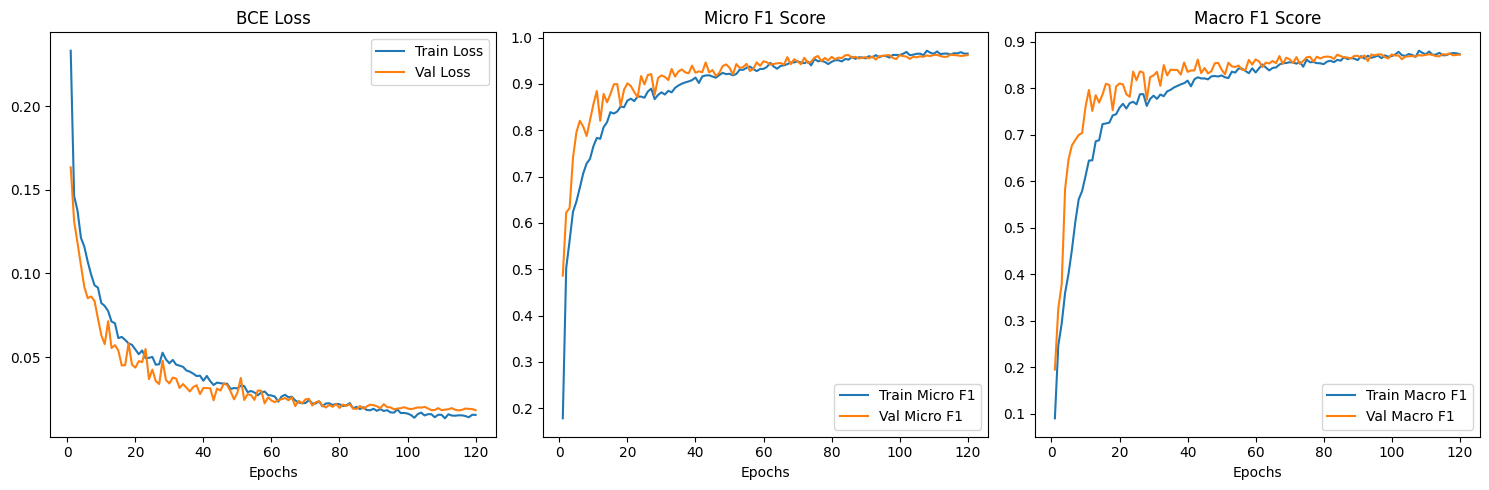

Audio Config used during training:
{'sr': 44100, 'duration': 3.0, 'n_mels': 128, 'win_ms': 30.0, 'hop_ms': 10.0, 'fmin': 20.0, 'fmax': 20000.0}


In [ ]:
from utils import plot_metrics

MODEL_WEIGHTS = Path(WEIGHTS_DIR / "last.pt")
ckpt_loaded = torch.load(MODEL_WEIGHTS, map_location="cpu")
audio_params = ckpt_loaded['audio_config']
history = ckpt_loaded["history"]
plot_metrics(history)

print("Audio Config used during training:")
print(audio_params)